In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [3]:
#모멘텀 전략 portfolio

#Data Call
Data_P = pd.ExcelFile('Data_MSCI_m.xlsx').parse('Price').set_index('Date')
Data_TR = pd.ExcelFile('Data_MSCI_m.xlsx').parse('TR').set_index('Date')

In [112]:
#HPR(Except RF)
HPR = Data_TR.pct_change()*100 #pct_change .shift(1)안해도 전기간대비 수익률 퍼센트로 보여줌

In [86]:
#Sector Price / KOR 값 Drop
sector_P = Data_P.drop(Data_P.columns[[0]], axis = 1) #첫번째 column인 KOR 제거

In [93]:
#Sector Momentum
sector_m = (sector_P / sector_P.shift(12)-1)*100

In [97]:
#Sector Ranking
sector_r = sector_m.rank(axis=1,ascending=False)

In [105]:
#Boolean Indexing
sector_r[(sector_r <=2)] = 0.5
sector_r[(sector_r >=9)] = -0.5
sector_r[(sector_r >2) & (sector_r < 9)] = 0

In [124]:
#Rp 
Rp = pd.DataFrame(((HPR.loc[:,'ENE':'UTI'])*sector_r.shift()).sum(axis=1),columns=['Rp'])

In [148]:
Stdate = '2002-12-31'

Vp = Rp.loc[Stdate:,:]
Vp.iloc[0,0] = 0
Vp = (Vp/100 + 1).cumprod()*100
Vp.columns = ['Vp']

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [165]:
#Rm-Rf (series 형태)
Rm = HPR.iloc[:,0].copy()
Rf = Data_TR.iloc[:,11].copy()/12
RmRf = Rm-Rf

Date = Data_P.index
stDateNum = 20021231
stDate = pd.to_datetime(str(stDateNum),format = '%Y%m%d')
idx = np.argmin(np.abs(Date - stDate))

Time = Date[idx:].copy()
numData = Time.shape[0]

In [175]:
#변수 날짜 설정(Stdate 시점으로 고정)
Rmrf_ = RmRf[idx:]
Rm_ = Rm[idx:]
Rf_ = Rf[idx:]

#Pmf Portfolio
Pmf = pd.Series(np.zeros(numData))
Pmf[0] = 100
for t in range(1,numData):
    Pmf[t] = Pmf[t-1]*(1+Rmrf_[t]/100)

In [177]:
#MDD 도출

#모멘텀 MDD
Vmax = Vp.cummax()
MDD_V = (Vp/Vmax-1)*100

#RmRf MD
Pmax = Pmf.cummax()
MDD_P = (Pmf/Pmax-1)*100

/usr/local/lib/python3.5/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


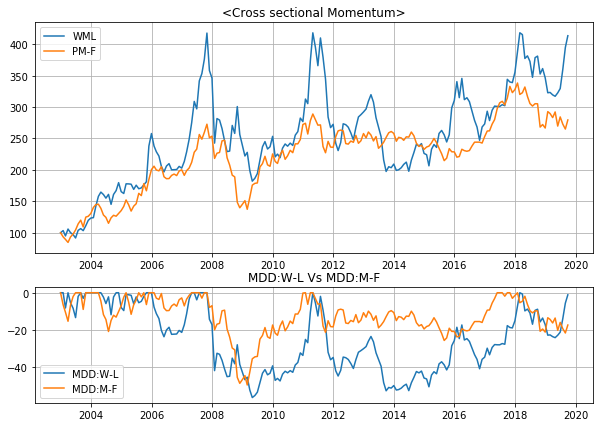

In [185]:
#그래프 그리기
fig = plt.figure(figsize = (10,7))
gs = gridspec.GridSpec(nrows=2,
                       ncols =1,
                       height_ratios= [8,4],
                       width_ratios= [5]) #subplot의 크기를 서로 다르게 설정

#Value
ax0 = plt.subplot(gs[0])
ax0.plot(Time,Vp, label = 'WML');
ax0.plot(Time,Pmf, label = 'PM-F');
plt.title('<Cross sectional Momentum>')
ax0.grid(True)
ax0.legend()

#MDD
ax1 = plt.subplot(gs[1])
ax1.plot(Time, MDD_V, label = 'MDD:W-L');
ax1.plot(Time,MDD_P, label = 'MDD:M-F');
plt.title('MDD:W-L Vs MDD:M-F')
ax1.grid(True)
ax1.legend()